<a href="https://colab.research.google.com/github/SusanMezaImata17/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Librerias y data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA

## Revisando campos Nulos de la columna  Item_Identifier

In [ ]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
data = df[df['Item_Weight'].isna()]
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [ ]:
gb = df.groupby('Item_Identifier')['Item_Weight'].agg(['min', 'max','mean'])
gb

,min,max,mean
Item_Identifier,,,
DRA12,11.600,11.600,11.600
DRA24,19.350,19.350,19.350
DRA59,8.270,8.270,8.270
DRB01,7.390,7.390,7.390
DRB13,6.115,6.115,6.115
...,...,...,...
NCZ30,6.590,6.590,6.590
NCZ41,19.850,19.850,19.850
NCZ42,10.500,10.500,10.500


Observamos que cada valor unico de la columna Item_Identifie poseen un unico peso lo cual nos permite inputar los valores nulos de la columna

In [ ]:
peso_por_item = df.groupby('Item_Identifier')['Item_Weight'].mean()
mapeo_peso_por_item = peso_por_item.to_dict()
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(mapeo_peso_por_item))


Asignamos el peso correspondiendo a los campos nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Comprobamos los cambios y vemos que aun quedan ciertos valores nulos en la columna

In [ ]:
item_nulo = df[df['Item_Weight'].isna()]
item_nulo.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


No podemos determinar el peso para estos productos y procedemos a eliminarloss

In [ ]:
dato = df[df['Item_Type'] == 'Frozen Foods']
dato.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250
51,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
75,FDC29,8.390,Regular,0.024206,Frozen Foods,114.0176,OUT046,1997,Small,Tier 1,Supermarket Type1,2290.3520
78,FDL04,19.000,Low Fat,0.112557,Frozen Foods,104.9622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1587.9330
81,FDN04,11.800,reg,0.014087,Frozen Foods,180.3344,OUT046,1997,Small,Tier 1,Supermarket Type1,1427.4752
95,FDU04,7.930,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.150,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300


## Revisando campos Nulos de la columna Outlet_Size

In [ ]:
Outlet_nulo = df[df['Outlet_Size'].isna()]
Outlet_nulo.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [ ]:
df.prueba = df.copy()
# Mapear las categorías a valores numéricos
mapping_size = {'Small': 1, 'Medium': 2, 'High': 3}
df.prueba['Outlet_Size_Num'] = df.prueba['Outlet_Size'].map(mapping_size)

# Agrupar y calcular las estadísticas
gb2 = df.prueba.groupby('Outlet_Identifier')['Outlet_Size_Num'].agg(['min', 'max', 'mean'])

# Renombrar las columnas
gb2.columns = ['min_size', 'max_size', 'mean_size']
gb2

<ipython-input-327-233a0f4c84cb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.prueba = df.copy()


,min_size,max_size,mean_size
Outlet_Identifier,,,
OUT010,NaN,NaN,NaN
OUT013,3.0,3.0,3.0
OUT017,NaN,NaN,NaN
OUT018,2.0,2.0,2.0
OUT019,1.0,1.0,1.0
OUT027,2.0,2.0,2.0
OUT035,1.0,1.0,1.0
OUT045,NaN,NaN,NaN
OUT046,1.0,1.0,1.0


* Filtramos los valores Unicos de la columna Outlet_Identifier en relacion a los valores de la columna Outlet_Size

In [ ]:
valor1 = df[df['Outlet_Identifier'] == 'OUT010']
valor1['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    555
Name: count, dtype: int64

In [ ]:
out_type2 = df[df['Outlet_Location_Type'] == 'Tier 3']
out_type2['Outlet_Size'].value_counts()

Outlet_Size
Medium    1863
High       932
Name: count, dtype: int64

* Tier 3 cotiene 2 Medidas: Medium y High

In [ ]:
valor_1 = df[df['Outlet_Identifier'] == 'OUT010']
valor_1['Outlet_Type'].value_counts()

Outlet_Type
Grocery Store    555
Name: count, dtype: int64

In [ ]:
filtrado = df[df['Outlet_Type'] == 'Grocery Store']
filtrado['Outlet_Size'].value_counts()

Outlet_Size
Small    528
Name: count, dtype: int64

Como Indentidicar el Tier 3 no es suficiente para determinar la medida del Outlet usamos Outlet_Type como identidicador para determinar cual es su medida correspondiente y encontramos que es Small

In [ ]:
valor2 = df[df['Outlet_Identifier'] == 'OUT017']
valor2['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 2    926
Name: count, dtype: int64

In [ ]:
valor3 = df[df['Outlet_Identifier'] == 'OUT045']
valor3['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 2    929
Name: count, dtype: int64

OUT045 y OUT017 Tienen como Outlet_Location_Type. Eso quiere decir que los valores nulos que contenga se puden inputar por la medida Small

In [ ]:
out_type = df[df['Outlet_Location_Type'] == 'Tier 2']
out_type['Outlet_Size'].value_counts()

Outlet_Size
Small    930
Name: count, dtype: int64

Encontramos que cuando el Outlet_Location_Type es Tier 2, todas sus Outlet_Size son tipo Small

* Podemos determinar que Tier 3 Presenta 3 medidas de las cuales en la data solo estan registradas 2 (Medium y High), mientras que Tier 2 solo presenta la medida Small
* Se concluye que los valores nulos del tamaño de los Outlet son Small

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

Usamos el meotodo para reemplazar los nulos

In [ ]:
df = df.dropna()
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Borramos las filas con datos nulos y verficamos que no hayan filas duplicadas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


## Graficos

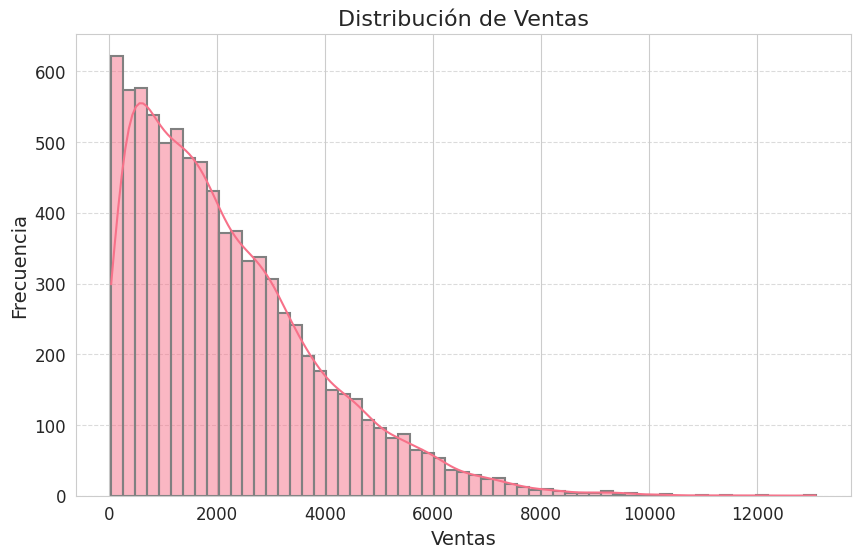

In [ ]:
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 10)
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], kde=True, color=palette[0], edgecolor='gray', linewidth=1.5)
plt.title('Distribución de Ventas', fontsize=16)
plt.xlabel('Ventas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Este gráfico busca mostrar la distribución de las ventas de productos en los diferentes puntos de venta.**

<ipython-input-340-35aad0a6608d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='muted')


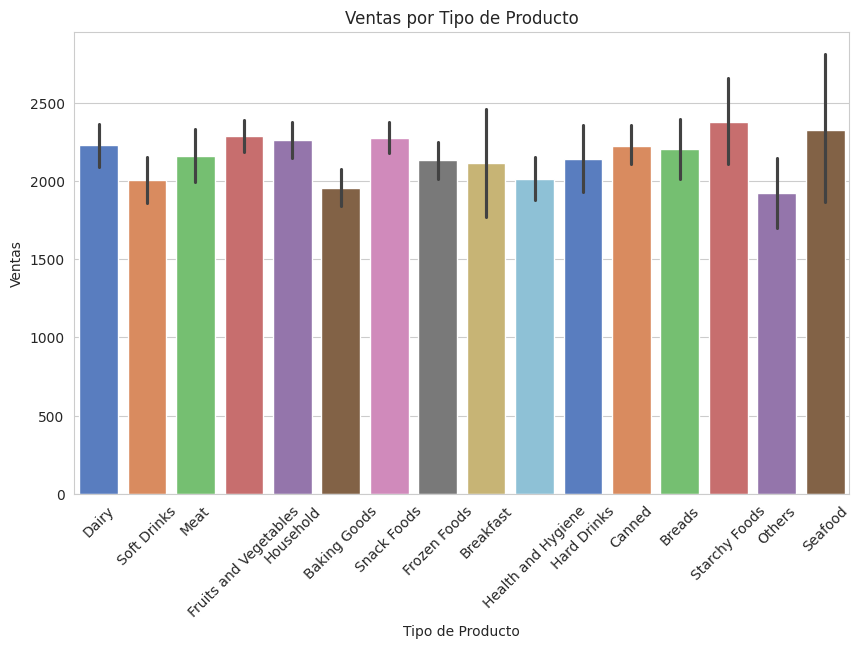

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='muted')
plt.title('Ventas por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

<ipython-input-341-ef69e82ca70b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='pastel')


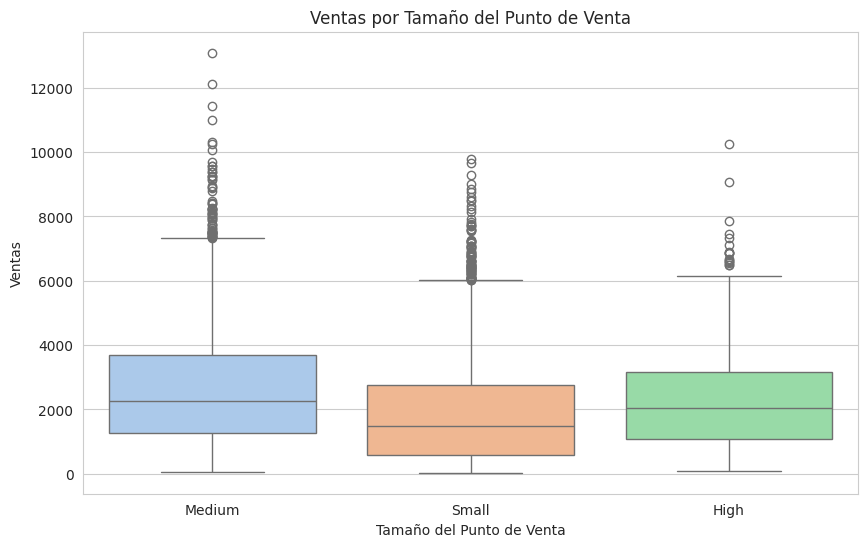

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='pastel')
plt.title('Ventas por Tamaño del Punto de Venta')
plt.xlabel('Tamaño del Punto de Venta')
plt.ylabel('Ventas')
plt.show()

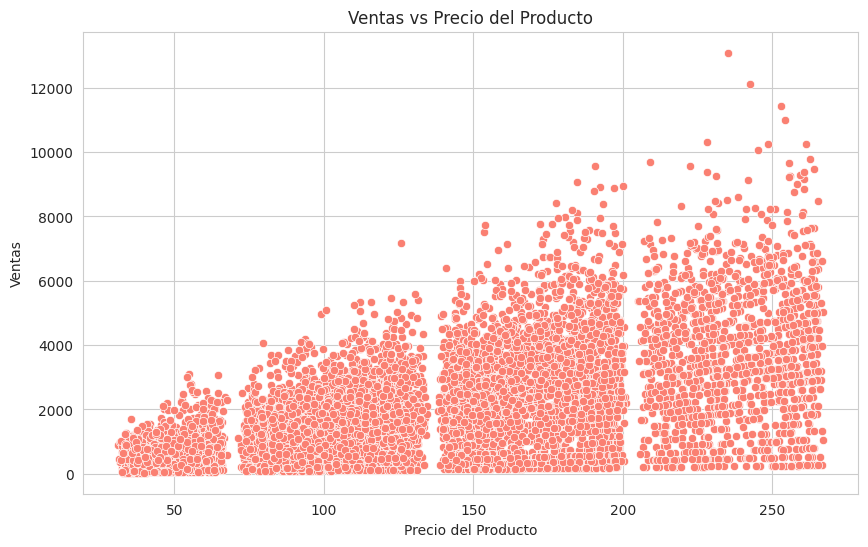

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, color='salmon')
plt.title('Ventas vs Precio del Producto')
plt.xlabel('Precio del Producto')
plt.ylabel('Ventas')
plt.show()

<ipython-input-343-5204f3a41214>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')
<ipython-input-343-5204f3a41214>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')


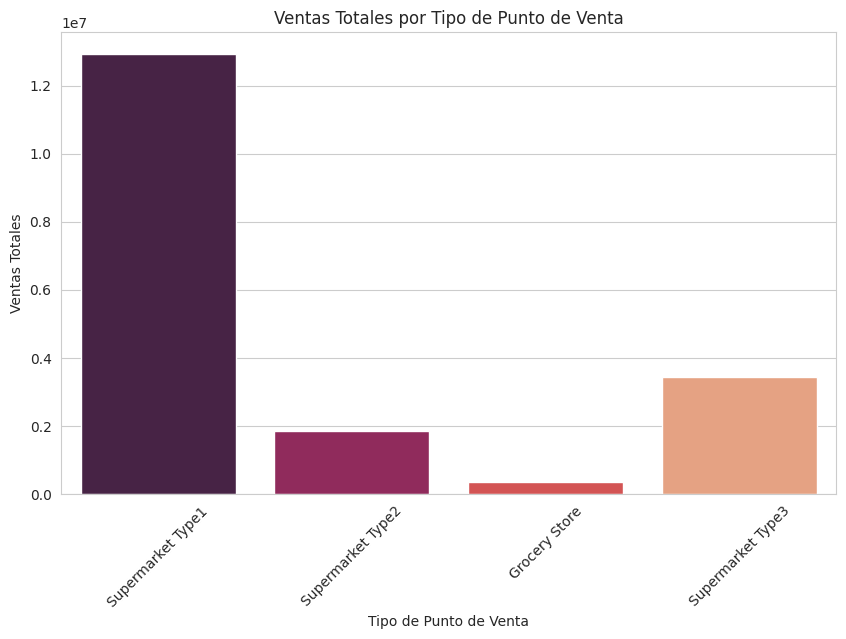

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, estimator=sum, ci=None, palette='rocket')
plt.title('Ventas Totales por Tipo de Punto de Venta')
plt.xlabel('Tipo de Punto de Venta')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

# Preprocesamiento

## Transformacion de columnas categoricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [ ]:
columnas_categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
df = pd.get_dummies(df, columns=columnas_categoricas)

columnas_dummy = df.columns[df.columns.str.startswith('Item_Fat_Content') |
                             df.columns.str.startswith('Item_Type') |
                             df.columns.str.startswith('Outlet_Identifier') |
                             df.columns.str.startswith('Outlet_Size') |
                             df.columns.str.startswith('Outlet_Location_Type') |
                             df.columns.str.startswith('Outlet_Type')]
df[columnas_dummy] = df[columnas_dummy].astype(int)

In [ ]:
df = df.drop(columns=['Item_Identifier'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8519 non-null   float64
 1   Item_Visibility                  8519 non-null   float64
 2   Item_MRP                         8519 non-null   float64
 3   Outlet_Establishment_Year        8519 non-null   int64  
 4   Item_Outlet_Sales                8519 non-null   float64
 5   Item_Fat_Content_LF              8519 non-null   int64  
 6   Item_Fat_Content_Low Fat         8519 non-null   int64  
 7   Item_Fat_Content_Regular         8519 non-null   int64  
 8   Item_Fat_Content_low fat         8519 non-null   int64  
 9   Item_Fat_Content_reg             8519 non-null   int64  
 10  Item_Type_Baking Goods           8519 non-null   int64  
 11  Item_Type_Breads                 8519 non-null   int64  
 12  Item_Type_Breakfast      

<Axes: >

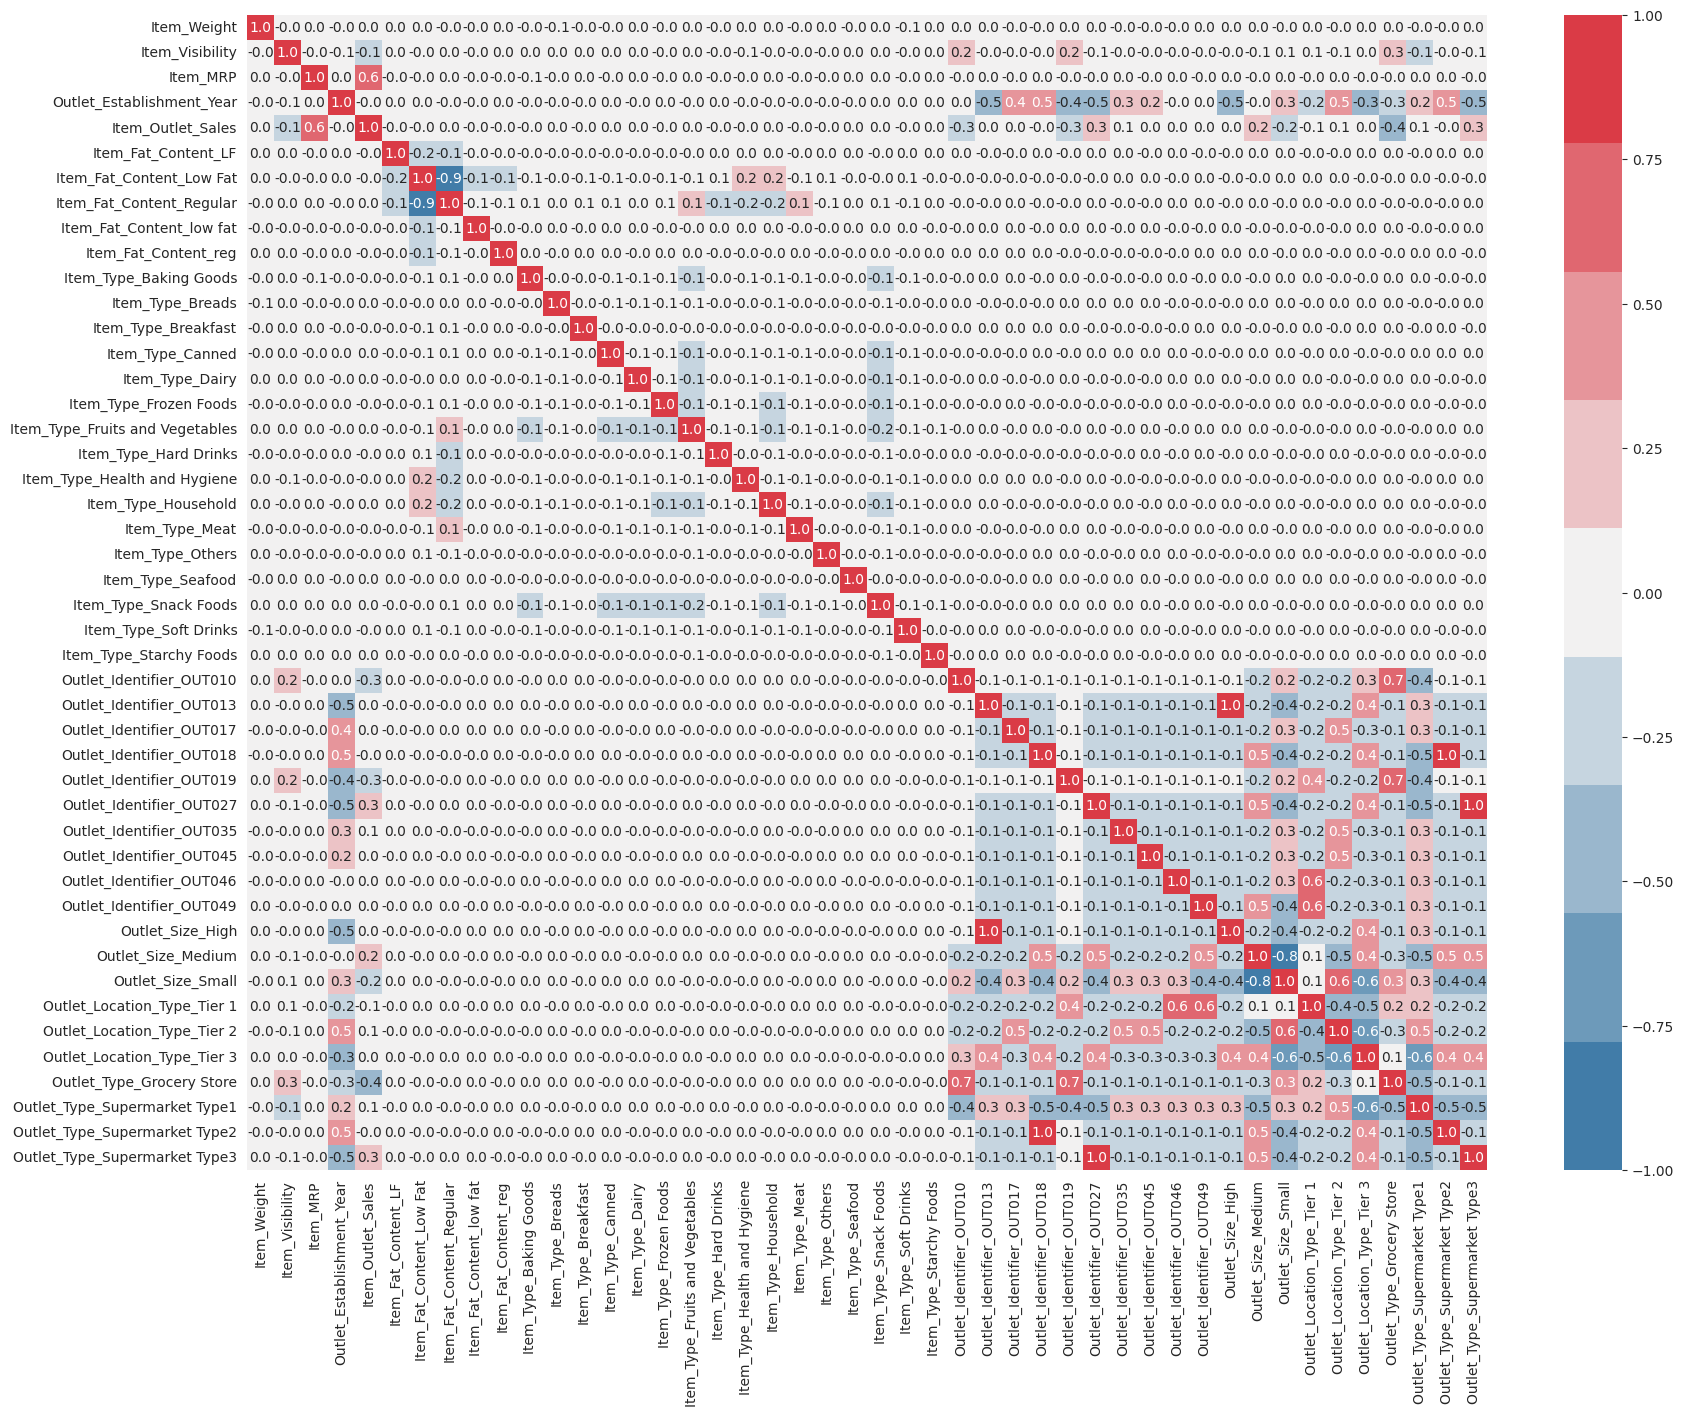

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True, fmt='.1f', vmin=-1, vmax=1)

In [ ]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8519 non-null   float64
 1   Item_Visibility                  8519 non-null   float64
 2   Item_MRP                         8519 non-null   float64
 3   Outlet_Establishment_Year        8519 non-null   int64  
 4   Item_Fat_Content_LF              8519 non-null   int64  
 5   Item_Fat_Content_Low Fat         8519 non-null   int64  
 6   Item_Fat_Content_Regular         8519 non-null   int64  
 7   Item_Fat_Content_low fat         8519 non-null   int64  
 8   Item_Fat_Content_reg             8519 non-null   int64  
 9   Item_Type_Baking Goods           8519 non-null   int64  
 10  Item_Type_Breads                 8519 non-null   int64  
 11  Item_Type_Breakfast              8519 non-null   int64  
 12  Item_Type_Canned         

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.769598,-0.970582,1.746938,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
1,-1.497133,-0.907946,-1.489096,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,-1.376826,2.860062,-0.350488
2,0.995427,-0.956764,0.009762,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
3,1.361347,-1.281681,0.659682,0.019371,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,-0.697851,0.880853,-0.623915,-0.696921,1.243087,2.621714,-1.376826,-0.349643,-0.350488
4,-0.849240,-1.281681,-1.399305,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,0.726308,-0.349643,-0.350488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-1.293725,-0.180855,1.180344,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,0.726308,-0.349643,-0.350488
8515,-0.967626,-0.370861,-0.527506,0.497347,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,3.488112,...,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
8516,-0.489777,-0.599546,-0.897362,0.736336,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
8517,-1.219465,1.533626,-0.608170,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,-1.376826,2.860062,-0.350488


In [ ]:
X.columns = [
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Establishment_Year',
    'Item_Fat_Content_LF',
    'Item_Fat_Content_Low Fat',
    'Item_Fat_Content_Regular',
    'Item_Fat_Content_low fat',
    'Item_Fat_Content_reg',
    'Item_Type_Baking Goods',
    'Item_Type_Breads',
    'Item_Type_Breakfast',
    'Item_Type_Canned',
    'Item_Type_Dairy',
    'Item_Type_Frozen Foods',
    'Item_Type_Fruits and Vegetables',
    'Item_Type_Hard Drinks',
    'Item_Type_Health and Hygiene',
    'Item_Type_Household',
    'Item_Type_Meat',
    'Item_Type_Others',
    'Item_Type_Seafood',
    'Item_Type_Snack Foods',
    'Item_Type_Soft Drinks',
    'Item_Type_Starchy Foods',
    'Outlet_Identifier_OUT010',
    'Outlet_Identifier_OUT013',
    'Outlet_Identifier_OUT017',
    'Outlet_Identifier_OUT018',
    'Outlet_Identifier_OUT019',
    'Outlet_Identifier_OUT027',
    'Outlet_Identifier_OUT035',
    'Outlet_Identifier_OUT045',
    'Outlet_Identifier_OUT046',
    'Outlet_Identifier_OUT049',
    'Outlet_Size_High',
    'Outlet_Size_Medium',
    'Outlet_Size_Small',
    'Outlet_Location_Type_Tier 1',
    'Outlet_Location_Type_Tier 2',
    'Outlet_Location_Type_Tier 3',
    'Outlet_Type_Grocery Store',
    'Outlet_Type_Supermarket Type1',
    'Outlet_Type_Supermarket Type2',
    'Outlet_Type_Supermarket Type3'
]
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.769598,-0.970582,1.746938,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
1,-1.497133,-0.907946,-1.489096,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,-1.376826,2.860062,-0.350488
2,0.995427,-0.956764,0.009762,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
3,1.361347,-1.281681,0.659682,0.019371,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,-0.697851,0.880853,-0.623915,-0.696921,1.243087,2.621714,-1.376826,-0.349643,-0.350488
4,-0.849240,-1.281681,-1.399305,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,0.726308,-0.349643,-0.350488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-1.293725,-0.180855,1.180344,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,0.726308,-0.349643,-0.350488
8515,-0.967626,-0.370861,-0.527506,0.497347,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,3.488112,...,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
8516,-0.489777,-0.599546,-0.897362,0.736336,-0.196271,0.821177,-0.715778,-0.115422,-0.118005,-0.286688,...,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.804449,-0.381430,0.726308,-0.349643,-0.350488
8517,-1.219465,1.533626,-0.608170,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.118005,-0.286688,...,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,1.243087,-0.381430,-1.376826,2.860062,-0.350488


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8519 non-null   float64
 1   Item_Visibility                  8519 non-null   float64
 2   Item_MRP                         8519 non-null   float64
 3   Outlet_Establishment_Year        8519 non-null   float64
 4   Item_Fat_Content_LF              8519 non-null   float64
 5   Item_Fat_Content_Low Fat         8519 non-null   float64
 6   Item_Fat_Content_Regular         8519 non-null   float64
 7   Item_Fat_Content_low fat         8519 non-null   float64
 8   Item_Fat_Content_reg             8519 non-null   float64
 9   Item_Type_Baking Goods           8519 non-null   float64
 10  Item_Type_Breads                 8519 non-null   float64
 11  Item_Type_Breakfast              8519 non-null   float64
 12  Item_Type_Canned    

In [ ]:
preprocessing_pipeline = make_pipeline(sc)
preprocessing_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
X_procesado = pd.DataFrame(preprocessing_pipeline.fit_transform(X),
                           columns=X.columns, index=X.index)

X_procesado

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breakfast,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.769598,-0.970582,1.746938,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.286688,-0.114373,...,-0.350065,2.856609,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.381430,-0.349643,-0.350488
1,-1.497133,-0.907946,-1.489096,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,-0.381430,2.860062,-0.350488
2,0.995427,-0.956764,0.009762,0.138865,-0.196271,0.821177,-0.715778,-0.115422,-0.286688,-0.114373,...,-0.350065,2.856609,-0.350488,1.432971,-1.135263,1.602784,-0.696921,-0.381430,-0.349643,-0.350488
3,1.361347,-1.281681,0.659682,0.019371,-0.196271,-1.217764,1.397081,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,-0.350488,-0.697851,0.880853,-0.623915,-0.696921,2.621714,-0.349643,-0.350488
4,-0.849240,-1.281681,-1.399305,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,-0.381430,-0.349643,-0.350488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-1.293725,-0.180855,1.180344,-1.295064,-0.196271,0.821177,-0.715778,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,2.853166,-0.697851,-1.135263,-0.623915,-0.696921,-0.381430,-0.349643,-0.350488
8515,-0.967626,-0.370861,-0.527506,0.497347,-0.196271,-1.217764,1.397081,-0.115422,3.488112,-0.114373,...,-0.350065,-0.350065,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.381430,-0.349643,-0.350488
8516,-0.489777,-0.599546,-0.897362,0.736336,-0.196271,0.821177,-0.715778,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,-0.350488,-0.697851,0.880853,-0.623915,1.434882,-0.381430,-0.349643,-0.350488
8517,-1.219465,1.533626,-0.608170,1.333806,-0.196271,-1.217764,1.397081,-0.115422,-0.286688,-0.114373,...,-0.350065,-0.350065,-0.350488,1.432971,-1.135263,-0.623915,-0.696921,-0.381430,2.860062,-0.350488


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.3, random_state=42)
print(X_train.info()) # Set de características de datos de training
print(X_test.info()) # Set de características de datos de test

<class 'pandas.core.frame.DataFrame'>
Index: 5963 entries, 655 to 7270
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5963 non-null   float64
 1   Item_Visibility                  5963 non-null   float64
 2   Item_MRP                         5963 non-null   float64
 3   Outlet_Establishment_Year        5963 non-null   float64
 4   Item_Fat_Content_LF              5963 non-null   float64
 5   Item_Fat_Content_Low Fat         5963 non-null   float64
 6   Item_Fat_Content_Regular         5963 non-null   float64
 7   Item_Fat_Content_low fat         5963 non-null   float64
 8   Item_Type_Baking Goods           5963 non-null   float64
 9   Item_Type_Breakfast              5963 non-null   float64
 10  Item_Type_Canned                 5963 non-null   float64
 11  Item_Type_Dairy                  5963 non-null   float64
 12  Item_Type_Frozen Foods 

# Modelos de Regresion

## KNN

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_regressor.score(X_train,y_train)

0.6358385181390865

In [ ]:
knn_regressor.score(X_test,y_test)

0.42732081326458005

In [ ]:
y_pred = knn_regressor.predict(X_test)

In [ ]:
res=pd.DataFrame()
res['Y real']=y_test
res['Y Pred']=y_pred
res

,Y real,Y Pred
7502,1318.2840,2389.15672
7846,559.2720,1294.44836
2573,259.6620,138.88588
1085,5173.2660,4679.24240
856,2356.9320,3972.29596
...,...,...
777,4287.7520,2584.36928
1120,1482.0708,367.78792
7275,2922.1962,2818.99720
2950,697.0926,374.97856


In [ ]:
print("\nK-Nearest Neighbors Regressor:")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred)}")


K-Nearest Neighbors Regressor:
Error cuadrático medio: 1650676.7257082888
Coeficiente de determinación (R^2): 0.42732081326458005


- El resultado muestra que se ha utilizado un modelo de regresión de “k-Nearest Neighbors” para predecir las ventas. El error cuadrático medio es 1666974.36079399, lo que indica la diferencia entre los valores observados y los predichos; cuanto menor sea este valor, mejor será el modelo. El coeficiente de determinación (R^2) es 0.4216665767872708, lo que indica que aproximadamente el 42% de la variabilidad en las ventas puede explicarse con el modelo.

- Mejorar el Modelo: Para mejorar este modelo, se podría considerar la optimización de parámetros, la inclusión de más características o variables explicativas y probar diferentes algoritmos de regresión para comparar su rendimiento. También podrías considerar técnicas de preprocesamiento de datos adicionales, como la normalización o la estandarización, que a veces pueden mejorar el rendimiento de los modelos de KNN.
- Para determinar qué características están más asociadas con las ventas mayores, necesitaríamos realizar un análisis de importancia de características. Sin embargo, el algoritmo K-Nearest Neighbors (KNN) no proporciona una forma directa de obtener la importancia de las características ya que es un modelo basado en instancias y no aprende coeficientes para cada característica como lo hacen otros modelos como la regresión lineal.

## Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.predict(X_test).round()

array([2297., 1127., -444., ..., 2157., 1701., 2920.])

In [ ]:
print(reg.score(X_test, y_test))

0.5623794138299305


In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
resultados=pd.DataFrame()
resultados["Y real"]=y_test
resultados["Y predicho"]=y_pred
resultados.reset_index(drop=True)

,Y real,Y predicho
0,1318.2840,2297.255317
1,559.2720,1127.255317
2,259.6620,-444.244683
3,5173.2660,4140.005317
4,2356.9320,3327.255317
...,...,...
2551,4287.7520,3144.755317
2552,1482.0708,1445.755317
2553,2922.1962,2157.255317
2554,697.0926,1700.880317


In [ ]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print(mae)
print(mse)
print(rmse)

827.6242650149252
1261387.0610518453
1123.1148921868346


- Obtener los coeficientes estimados del modelo

In [ ]:
coeficientes = reg.coef_
coeficientes_df = pd.DataFrame({'Característica': X_train.columns, 'Coeficiente': coeficientes})
coeficientes_df = coeficientes_df.reindex(coeficientes_df['Coeficiente'].abs().sort_values(ascending=False).index)
print(coeficientes_df.head(10))

                   Característica   Coeficiente
33             Outlet_Size_Medium -4.701975e+15
36    Outlet_Location_Type_Tier 2  2.711296e+15
39  Outlet_Type_Supermarket Type3  2.429428e+15
31       Outlet_Identifier_OUT049  2.308754e+15
3       Outlet_Establishment_Year  2.064494e+15
25       Outlet_Identifier_OUT017 -1.842165e+15
28       Outlet_Identifier_OUT035 -1.614858e+15
27       Outlet_Identifier_OUT027  1.461286e+15
29       Outlet_Identifier_OUT045 -1.460305e+15
38  Outlet_Type_Supermarket Type2  1.447733e+15


- Los resultados indican que tu modelo de regresión tiene un coeficiente de determinación (R^2) de 0.5624. Esto significa que aproximadamente el 56.24% de la variabilidad en las ventas puede explicarse con el modelo, lo cual es un resultado decente pero aún hay margen de mejora.

Las métricas de error absoluto medio (MAE), error cuadrático medio (MSE) y raíz del error cuadrático medio (RMSE) son 827.67, 1261327.80 y 1123.09 respectivamente. Estas métricas representan la diferencia entre los valores observados y los predichos; cuanto menor sea este valor, mejor será el modelo.
 - Mejorar el Modelo:
1. Optimización de Parámetros
2.  Inclusión de más características
3. Prueba de diferentes algoritmos
- ¿Qué características están más asociadas con la predicción de ventas mayores?
1. Outlet_Location_Type_Tier 1
2. Outlet_Location_Type_Tier 3
3. Item_Fat_Content_Low Fat
4. Outlet_Type_Supermarket Type3
5. Item_Fat_Content_Regular
 -Estas características tienen los coeficientes más altos en valor absoluto en el modelo, lo que indica que están más asociadas con las predicciones de ventas mayores.